## In this notebook

- Example code for the "Python tools for data scientists" talk at [NUST](https://www.nust.na/).

In [1]:
DATA_PATH = "/usr/src/app/data/palmer_penguins.csv"

## pandas

*Python library for tabular data processing.*

In [2]:
import pandas as pd

In [3]:
# load data

df = (
    pd
    .read_csv(
        filepath_or_buffer=DATA_PATH,
        usecols=["pinguin_id", "species", "bill_length", "bill_depth", "sex"],
    )
)

print(df)

    pinguin_id species  bill_length  bill_depth     sex
0         N1A1  adelie         39.1        18.7    MALE
1         N1A2  adelie         39.5        17.4  FEMALE
2         N2A1  adelie         40.3        18.0  FEMALE
3         N2A2  adelie          NaN         NaN     NaN
4         N3A1  adelie         36.7        19.3  FEMALE
..         ...     ...          ...         ...     ...
339      N38A2  gentoo          NaN         NaN     NaN
340      N39A1  gentoo         46.8        14.3  FEMALE
341      N39A2  gentoo         50.4        15.7    MALE
342      N43A1  gentoo         45.2        14.8  FEMALE
343      N43A2  gentoo         49.9        16.1    MALE

[344 rows x 5 columns]


In [4]:
# process data

df = (
    df
    .dropna()
    .assign(
        sex=lambda _df: (_df.sex == "MALE").astype(int),
    )
)

print(df)

    pinguin_id species  bill_length  bill_depth  sex
0         N1A1  adelie         39.1        18.7    1
1         N1A2  adelie         39.5        17.4    0
2         N2A1  adelie         40.3        18.0    0
4         N3A1  adelie         36.7        19.3    0
5         N3A2  adelie         39.3        20.6    1
..         ...     ...          ...         ...  ...
338      N38A1  gentoo         47.2        13.7    0
340      N39A1  gentoo         46.8        14.3    0
341      N39A2  gentoo         50.4        15.7    1
342      N43A1  gentoo         45.2        14.8    0
343      N43A2  gentoo         49.9        16.1    1

[334 rows x 5 columns]


## matplotlib

*Python library for data visualization.*

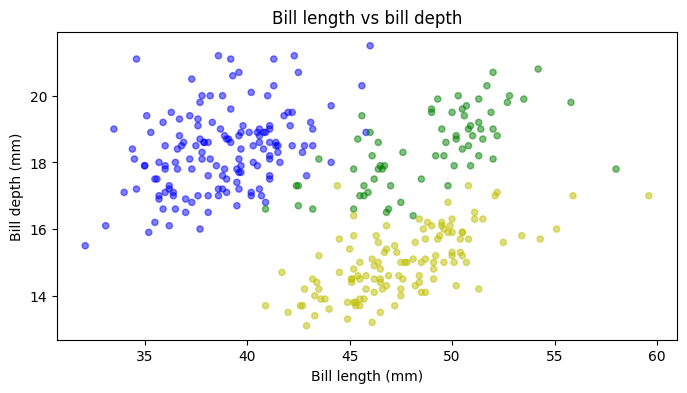

In [5]:
# vizualize data

(
    df
    .plot(
        kind="scatter",
        x="bill_length",
        y="bill_depth",
        color=df.species.map({
            "adelie": "b", 
            "chinstrap": "g", 
            "gentoo": "y",
        }),
        alpha=0.5,
        xlabel="Bill length (mm)", 
        ylabel="Bill depth (mm)", 
        title="Bill length vs bill depth",
        figsize=(8, 4),
    )
);

## scikit-learn

*Python library for ML models training and evaluation.*

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
# split data to train and test part
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df.species)

In [8]:
# train model on train data

X_cols = ["bill_length", "bill_depth", "sex"]
y_col = ["species"]

model = DecisionTreeClassifier()
model.fit(X=df_train[X_cols], y=df_train[y_col])

DecisionTreeClassifier()

In [9]:
# evaluate model

y_pred = model.predict(df_test[X_cols])
acc = accuracy_score(
    y_true=df_test[y_col], 
    y_pred=y_pred
)

print(f"Model accuracy on test data is {acc * 100:,.1f} %")

Model accuracy on test data is 97.0 %


## Results

- Created model for pinguins species classification.